In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

## Аккуратные данные (Tidy Data) и уборка данных (Data Cleaning)

### 📌 Аккуратные данные (Tidy Data)
**Аккуратные (tidy) данные** — это данные, организованные так, чтобы их удобно анализировать, визуализировать и использовать в моделях машинного обучения.

Концепция была предложена Хэдли Уикхэмом (Hadley Wickham)

### **Принципы аккуратных данных:**


1. **Каждый столбец** — это переменная.
2. **Каждая строка** — это наблюдение.
3. **Каждая ячейка** содержит **одно значение**.


🔹 **Пример аккуратных данных:**

| Дата       | Товар  | Цена | Количество |
|------------|--------|------|------------|
| 2025-03-10 | Яблоки | 100  | 5          |
| 2025-03-10 | Груши  | 120  | 3          |





### 🧹 Уборка данных (Data Cleaning)
**Уборка данных** — это процесс приведения данных в аккуратный и пригодный для анализа вид. Включает:

✔ **Удаление дубликатов**  
✔ **Заполнение или удаление пропущенных данных**  
✔ **Исправление ошибок в данных**  
✔ **Приведение форматов к единообразию**  
✔ **Удаление выбросов (аномалий)**  

🔹 **Пример до уборки:**

| Дата продажи | Товар   | Цена  | Кол-во |
|-------------|--------|------|--------|
| 10/03/25    | Яблоки | 100₽ | 5      |
| 2025-03-10  | груши  | 120р | 3      |
| 10-03-2025  | яблоки | NaN  | 2      |

🔹 **После уборки:**

| Дата       | Товар  | Цена | Количество |
|------------|--------|------|------------|
| 2025-03-10 | Яблоки | 100  | 5          |
| 2025-03-10 | Груши  | 120  | 3          |
| 2025-03-10 | Яблоки | 110  | 2          |

_(заменили NaN на среднее)_

---

## Поиск и удаление дубликатов

🔍 Удаление дубликатов (Removing Duplicates)

📌 Почему дубликаты — это плохо?

Дубликаты в данных могут привести к ошибочным выводам и некорректным результатам анализа. Они негативно влияют на:

	1.	Статистический анализ – Средние, медианные значения и другие метрики могут исказиться.
	2.	Машинное обучение – Дубликаты увеличивают вероятность переобучения модели.
	3.	Производительность – Лишние строки занимают память и замедляют обработку данных.
	4.	Отчетность – Ошибки в бизнес-отчетах, например, завышенные показатели продаж.

In [ ]:
df = pd.read_csv('netflix_titles_augmented.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.describe()

,release_year
count,8810.000000
mean,2014.181498
std,8.818092
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8810 entries, 0 to 8809
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8810 non-null   object
 1   type          8810 non-null   object
 2   title         8810 non-null   object
 3   director      6176 non-null   object
 4   cast          7985 non-null   object
 5   country       7979 non-null   object
 6   date_added    8800 non-null   object
 7   release_year  8810 non-null   int64 
 8   rating        8806 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8810 non-null   object
 11  description   8810 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.1+ KB


In [ ]:
### Найти полные дубликаты (все столбцы совпадают)

full_duplicates = df[df.duplicated(keep=False)]
full_duplicates

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4970,s4971,Movie,"Game Over, Man!",Kyle Newacheck,"Adam DeVine, Anders Holm, Blake Anderson, Utka...",United States,"March 23, 2018",2018,TV-MA,102 min,"Action & Adventure, Comedies",Three buddies with big dreams go from underach...
8807,s4971,Movie,"Game Over, Man!",Kyle Newacheck,"Adam DeVine, Anders Holm, Blake Anderson, Utka...",United States,"March 23, 2018",2018,TV-MA,102 min,"Action & Adventure, Comedies",Three buddies with big dreams go from underach...


In [ ]:
df.duplicated().sum()

1

In [ ]:
### Найти частичные дубликаты (одинаковый title, но разные show_id)
partial_duplicates = df[df.duplicated(subset=["title"], keep=False)]
partial_duplicates

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4970,s4971,Movie,"Game Over, Man!",Kyle Newacheck,"Adam DeVine, Anders Holm, Blake Anderson, Utka...",United States,"March 23, 2018",2018,TV-MA,102 min,"Action & Adventure, Comedies",Three buddies with big dreams go from underach...
8807,s4971,Movie,"Game Over, Man!",Kyle Newacheck,"Adam DeVine, Anders Holm, Blake Anderson, Utka...",United States,"March 23, 2018",2018,TV-MA,102 min,"Action & Adventure, Comedies",Three buddies with big dreams go from underach...
8808,s9999,Movie,"Game Over, Man!",Kyle Newacheck,"Adam DeVine, Anders Holm, Blake Anderson, Utka...",United States,"March 23, 2018",2018,TV-MA,102 min,"Action & Adventure, Comedies",Three buddies with big dreams go from underach...


## 🔥 Как бороться с дубликатами?

📌 Использовать drop_duplicates() в Pandas:

In [ ]:
df = df.drop_duplicates(keep="first")

In [ ]:
partial_duplicates = df[df.duplicated(subset=["title"], keep=False)]
partial_duplicates


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4970,s4971,Movie,"Game Over, Man!",Kyle Newacheck,"Adam DeVine, Anders Holm, Blake Anderson, Utka...",United States,"March 23, 2018",2018,TV-MA,102 min,"Action & Adventure, Comedies",Three buddies with big dreams go from underach...
8808,s9999,Movie,"Game Over, Man!",Kyle Newacheck,"Adam DeVine, Anders Holm, Blake Anderson, Utka...",United States,"March 23, 2018",2018,TV-MA,102 min,"Action & Adventure, Comedies",Three buddies with big dreams go from underach...


In [ ]:
df = df.drop_duplicates(subset=["title"], keep="first")
partial_duplicates = df[df.duplicated(subset=["title"], keep=False)]
partial_duplicates

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


## Обработка отсутствующих значений

Отсутствующие (NaN) значения могут мешать анализу данных и моделям машинного обучения.


1️⃣ Ошибки в расчетах и статистике 📊

❌ Проблема: Многие статистические функции (mean, median, std, corr) могут работать некорректно, если в данных есть NaN.





In [ ]:
data = pd.Series([0, np.nan, 100])
print(data.mean())  # Итог может быть не таким, как ожидалось!

50.0


In [ ]:
df['release_year'].mean()

2014.1806312443234

2️⃣ Ошибки при визуализации 📈

❌ Проблема: Библиотеки для визуализации (matplotlib, seaborn, plotly) могут отображать графики некорректно, если в данных есть пропущенные значения.

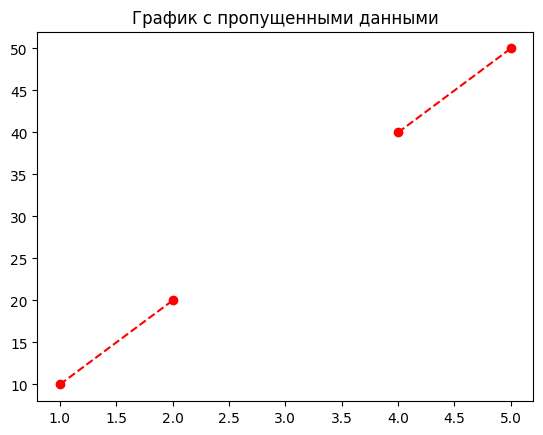

In [ ]:
x = [1, 2, 3, 4, 5]
y = [10, 20, np.nan, 40, 50]

plt.plot(x, y, marker="o", color='red', linestyle='--')
plt.title("График с пропущенными данными")
plt.show()

## Реальные примеры

📌 1. Titanic 🚢

Описание:
Этот датасет содержит информацию о пассажирах «Титаника» и используется для задач классификации выживших.

In [ ]:
titanic= pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv') #
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
np.sum(titanic.isna(), axis=0)

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Какие пропуски?

	•	Age (возраст) — много пропусков (около 20% данных).
	•	Cabin (номер каюты) — более 70% пропусков.
	•	Embarked (порт посадки) — несколько пропусков.

Что делать?

	•	Age можно заполнить медианой или предсказать.
	•	Cabin лучше удалить (слишком много NaN).
	•	Embarked можно заменить на наиболее частое значение.

📌 Заполняем “Age” медианой (числовой признак)

Возраст (Age) важен, но пропущен у ~20% пассажиров. Заполняем медианой.

In [ ]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


📌 Удаляем ненужные колонки с большим числом пропусков

Если Cabin содержит слишком много пропусков, иногда лучше удалить колонку:

In [ ]:
titanic = titanic.drop(columns=["Cabin"])
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


📌 Заполняем “Embarked” модой (категориальный признак)

Некоторые пассажиры не имеют данных о порте посадки (Embarked). Заполняем наиболее частым значением.

In [ ]:
titanic['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
titanic["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
titanic["Embarked"] = titanic["Embarked"].fillna(titanic["Embarked"].mode()[0])
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
titanic["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

## Применение интерполяции при отсутствующих значениях

In [ ]:
df = pd.read_csv(
    "AirQualityUCI_modified.csv",
    sep=";",         # Файл разделен точкой с запятой
    decimal=",",     # Числа записаны с запятой вместо точки
    skip_blank_lines=True
)

df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,O3(GT)
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,NaN,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,NaN
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,NaN
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,NaN,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,NaN
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,NaN


In [ ]:
chem_list = ['CO(GT)', 'C6H6(GT)', 'NO2(GT)', 'C6H6(GT)', 'NOx(GT)']

for chem in chem_list:
    df[chem] = df[chem].astype('float64').interpolate(method='linear')

In [ ]:
df = df.drop(columns=['O3(GT)'])

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9356 entries, 1 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9356 non-null   object 
 1   Time           9356 non-null   object 
 2   CO(GT)         9356 non-null   float64
 3   PT08.S1(CO)    9356 non-null   object 
 4   NMHC(GT)       9356 non-null   object 
 5   C6H6(GT)       9356 non-null   float64
 6   PT08.S2(NMHC)  9356 non-null   object 
 7   NOx(GT)        9356 non-null   float64
 8   PT08.S3(NOx)   9356 non-null   object 
 9   NO2(GT)        9356 non-null   float64
 10  PT08.S4(NO2)   9356 non-null   object 
 11  PT08.S5(O3)    9356 non-null   object 
 12  T              9356 non-null   object 
 13  RH             9356 non-null   object 
 14  AH             9356 non-null   object 
dtypes: float64(4), object(11)
memory usage: 1.1+ MB


## Основные методы интерполяции

**1. Линейная интерполяция (method='linear')**

Это самый простой метод, который предполагает линейную зависимость между известными значениями. Для каждого пропуска рассчитывается значение, которое лежит посередине между предыдущими и последующими значениями.

**2. Полиномиальная интерполяция (method='polynomial', order = ...)**

Этот метод позволяет проводить интерполяцию с помощью полинома заданной степени. Степень задаётся параметром order.

**3. Сплайн-интерполяция (method='spline', order=...)**

Сплайновая интерполяция используется для получения гладких кривых через известные точки. Параметр order определяет степень сплайновой функции.


## Исправление типов данных и ошибок в данных

In [ ]:
crime = pd.read_csv('crime.csv')
crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


**Алгоритм исправления колонок с датой и временем**

In [ ]:
crime = crime.dropna(subset=['TIME OCC']) # удаление строк с пропущенными значениями в столбце 'TIME OCC'

In [ ]:
crime['TIME OCC'] = crime['TIME OCC'].astype('int64').astype('str') # исправление типов данных

In [ ]:
crime.head()

In [ ]:
y = ":00" # замена времени по схеме HH:MM:SS

crime['TIME OCC'] = crime['TIME OCC'].apply(lambda x: "00:0" + x + y if len(x) == 1
                                            else "00:" + x + y if len(x) == 2
                                            else "0" + x[0] + ":" + x[1:] + y if len(x) == 3
                                            else x[:2] + ":" + x[2:] + y)
crime

In [ ]:
crime['DATE OCC'] = pd.to_datetime(crime['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p') # конвертация в datetime


In [ ]:
crime['DATE OCC'] = crime['DATE OCC'] + pd.to_timedelta(crime['TIME OCC']) # объединение данных колонок времени и даты


**Чистка лишних пробелов в колонке Location**

In [ ]:
import re # используем регулярные выражения

crime['LOCATION'] = crime['LOCATION'].apply(lambda x: re.sub(r'\s+', ' ', x))

In [ ]:
crime = crime.sort_values(by='LOCATION', ascending=False) # сортировка датасета